<a href="https://colab.research.google.com/github/PiyushPankajTechIS/EnsembleTechniques/blob/main/Bagging_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [35]:
df = pd.read_csv('/content/drive/MyDrive/talking_data.csv')

In [36]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [38]:
df.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [39]:
df.isnull().sum()*100/len(df)

ip                  0.000
app                 0.000
device              0.000
os                  0.000
channel             0.000
click_time          0.000
attributed_time    99.773
is_attributed       0.000
dtype: float64

In [40]:
df.drop('attributed_time',axis=1,inplace=True)

In [41]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [42]:
for col in df.columns:
  print(df[col].name)
  print(df[col].unique().shape)

ip
(34857,)
app
(161,)
device
(100,)
os
(130,)
channel
(161,)
click_time
(80350,)
is_attributed
(2,)


In [43]:
df.app.unique()

array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
        18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
        60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
        29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
       150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
        68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
        33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
        50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
       536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
        34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
        81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
       271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
       407, 116,  92, 115, 261])

In [44]:
df.app.value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
145        1
97         1
96         1
267        1
261        1
Name: app, Length: 161, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160]),
 <a list of 161 Text major ticklabel objects>)

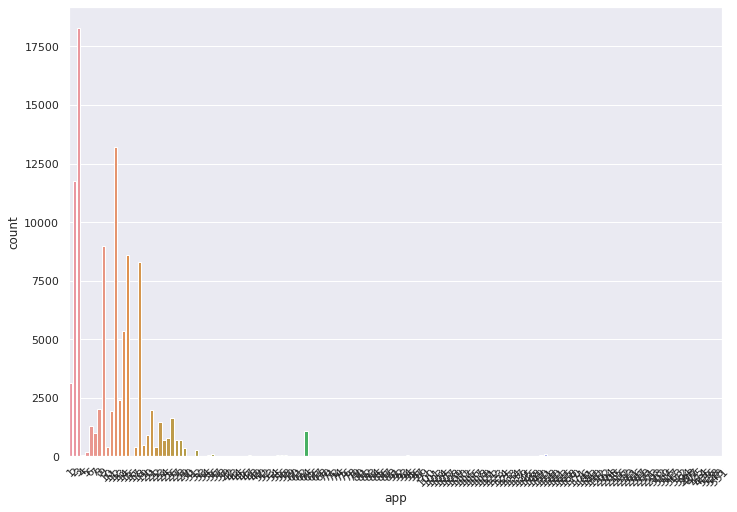

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df['app'])
plt.xticks(rotation=45)

In [48]:
from numpy.lib.function_base import quantile
apps = df.groupby('app').size().reset_index(name='count')
apps = apps[apps['count']>apps['count'].quantile(0.80)]
apps = apps.merge(df, on= 'app',how = 'inner')
apps.head()
apps['app'].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
18      8315
14      5359
1       3135
13      2422
8       2004
21      1979
11      1927
26      1633
23      1454
6       1303
64      1079
7        981
20       911
25       804
28       720
24       704
27       696
19       478
10       388
22       386
17       380
29       360
32       286
5        188
151      109
36       102
150       73
Name: app, dtype: int64

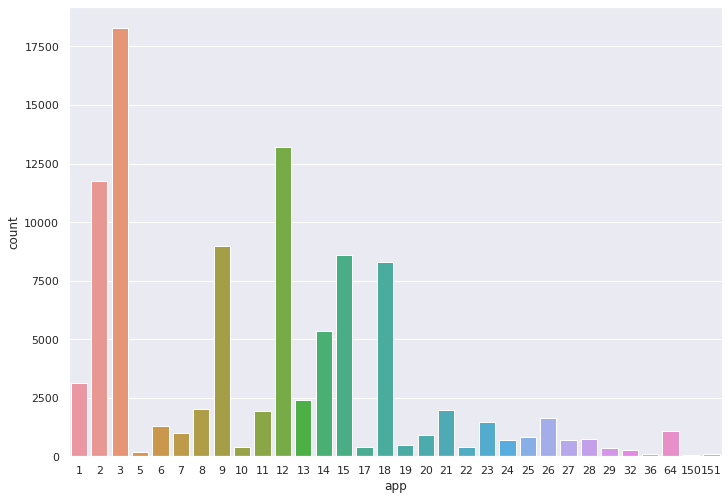

In [52]:
sns.countplot(apps.app)

In [53]:
df['year'] = pd.to_datetime(df.click_time).dt.year
df['month'] = pd.to_datetime(df.click_time).dt.month
df['day'] = pd.to_datetime(df.click_time).dt.day
df['hour'] = pd.to_datetime(df.click_time).dt.hour
df.head()

,ip,app,device,os,channel,click_time,is_attributed,year,month,day,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,2017,11,7,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,2017,11,7,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,2017,11,7,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,2017,11,7,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,2017,11,9,9


In [54]:
df.drop('click_time',axis = 1,inplace=True)

In [55]:
X = df.drop('is_attributed',axis = 1)
y = df['is_attributed']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
y_train.value_counts()

0    79824
1      176
Name: is_attributed, dtype: int64

In [86]:
y_test.value_counts()

0    19949
1       51
Name: is_attributed, dtype: int64

In [58]:
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
xgbl=XGBClassifier()
xgbl.fit(X_train,y_train)
test_pred=xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test,y_test)
print("The XGBoostclassifier model accuracy is {}".format(xgbl_score))
print("The confusion matrix of XGBoostclassifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The XGBoostclassifier model accuracy is 0.9974
The confusion matrix of XGBoostclassifier model is
[[19946     3]
 [   49     2]]


In [61]:
y_pred = xgbl.predict_proba(X_test)
y_pred

array([[9.99798715e-01, 2.01299714e-04],
       [9.99897242e-01, 1.02748207e-04],
       [9.99694586e-01, 3.05412395e-04],
       ...,
       [9.99817491e-01, 1.82523174e-04],
       [9.99791503e-01, 2.08467245e-04],
       [9.99889374e-01, 1.10618035e-04]], dtype=float32)

In [66]:
auc=metrics.roc_auc_score(y_test,y_pred[:,1])
print('AUC = {} %'.format(auc*100))


AUC = 96.53582321193554 %


Feature: 0, Score: 0.10972
Feature: 1, Score: 0.24423
Feature: 2, Score: 0.17859
Feature: 3, Score: 0.06746
Feature: 4, Score: 0.29377
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04889
Feature: 8, Score: 0.05735


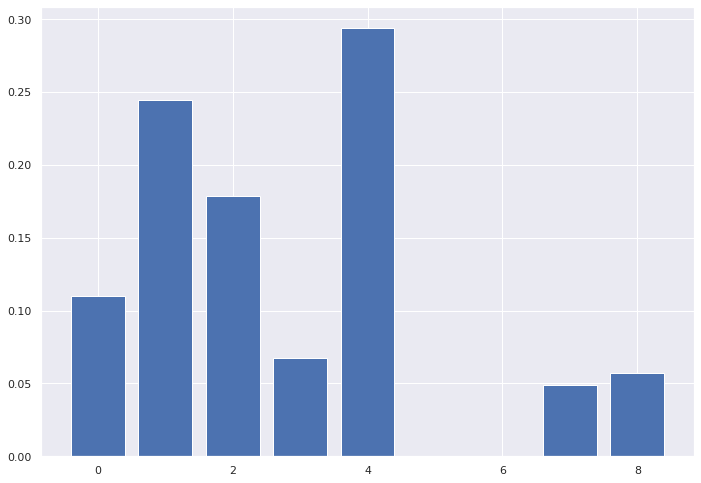

In [63]:
importance = xgbl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bgcl = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.99745
The confusion matrix of Bagging classifier model is
[[19949     0]
 [   51     0]]


In [70]:
y_pred = bgcl.predict_proba(X_test)

In [71]:
roc=metrics.roc_auc_score(y_test,y_pred[:,1])
print('AUC_ROC = {} %'.format(roc*100))

AUC_ROC = 82.47206848050764 %


In [72]:
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The XGBoostclassifier model accuracy is {}".format(xgbl_score))

The Bagging classifier model accuracy is 0.99745
The XGBoostclassifier model accuracy is 0.9974


In [73]:
y_pred[0:10]

array([[9.99666524e-01, 3.33475754e-04],
       [9.99593127e-01, 4.06872606e-04],
       [9.99694678e-01, 3.05322106e-04],
       [9.96899324e-01, 3.10067649e-03],
       [9.98341667e-01, 1.65833263e-03],
       [9.99557622e-01, 4.42378134e-04],
       [9.98458715e-01, 1.54128521e-03],
       [9.97482083e-01, 2.51791677e-03],
       [9.97530747e-01, 2.46925314e-03],
       [9.98606291e-01, 1.39370906e-03]])

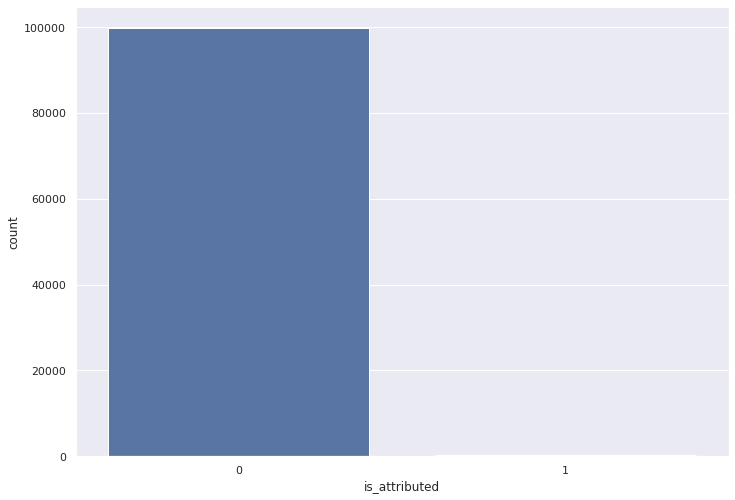

In [88]:
sns.countplot(df['is_attributed'])

In [89]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (100000, 9)
Shape of X after SMOTE: (199546, 9)


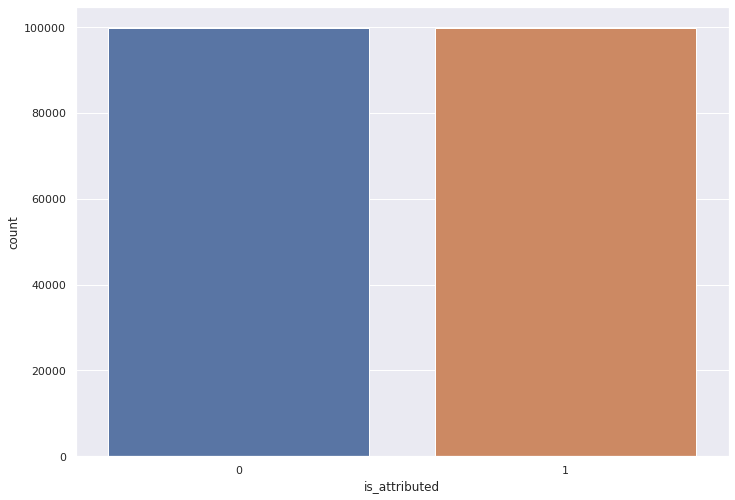

In [90]:
sns.countplot(y_sm)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [93]:
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
xgbl=XGBClassifier()
xgbl.fit(X_train,y_train)
test_pred=xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test,y_test)
print("The XGBoostclassifier model accuracy after smote is {}".format(xgbl_score))
print("The confusion matrix of XGBoostclassifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The XGBoostclassifier model accuracy after smote is 0.9545477323978953
The confusion matrix of XGBoostclassifier model is
[[19130   821]
 [  993 18966]]


In [94]:
y_pred = xgbl.predict_proba(X_test)
y_pred[0:10]

array([[0.00544381, 0.9945562 ],
       [0.00787586, 0.99212414],
       [0.00697047, 0.99302953],
       [0.02567488, 0.9743251 ],
       [0.9698881 , 0.03011189],
       [0.99498105, 0.00501897],
       [0.00389069, 0.9961093 ],
       [0.11941016, 0.88058984],
       [0.99623805, 0.00376196],
       [0.01376295, 0.98623705]], dtype=float32)

In [95]:
auc=metrics.roc_auc_score(y_test,y_pred[:,1])
print('AUC = {} %'.format(auc*100))


AUC = 99.16210945083402 %


Feature: 0, Score: 0.12524
Feature: 1, Score: 0.38107
Feature: 2, Score: 0.26325
Feature: 3, Score: 0.03401
Feature: 4, Score: 0.07636
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.08753
Feature: 8, Score: 0.03254


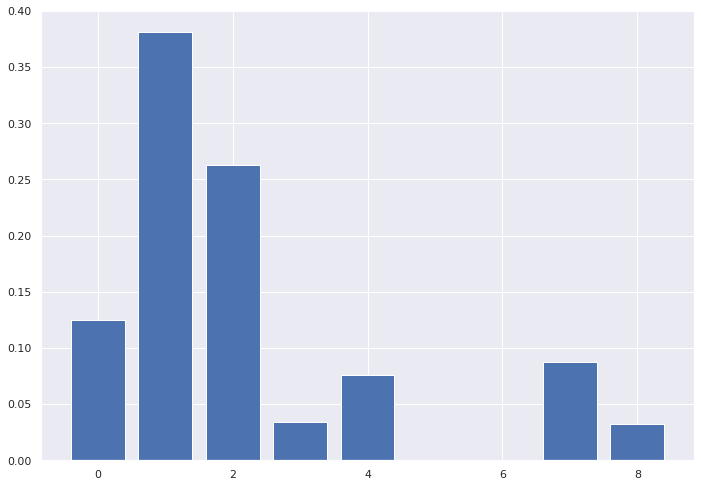

In [109]:
importance = xgbl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f'%(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bgcl = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.8089451265347031
The confusion matrix of Bagging classifier model is
[[16364  3587]
 [ 4038 15921]]


In [111]:
y_pred1 = bgcl.predict_proba(X_test)
y_pred1[:10]

array([[0.11849149, 0.88150851],
       [0.02633454, 0.97366546],
       [0.0533219 , 0.9466781 ],
       [0.75704594, 0.24295406],
       [0.58501146, 0.41498854],
       [0.8915726 , 0.1084274 ],
       [0.01167197, 0.98832803],
       [0.30350043, 0.69649957],
       [0.74022293, 0.25977707],
       [0.1001357 , 0.8998643 ]])

In [112]:
roc=metrics.roc_auc_score(y_test,y_pred1[:,1])
print('AUC_ROC = {} %'.format(roc*100))

AUC_ROC = 87.88728135221437 %


In [113]:
print("The Bagging classifier model accuracy after smote is {}".format(bgcl_score))
print("The XGBoostclassifier model accuracy after smote is {}".format(xgbl_score))

The Bagging classifier model accuracy after smote is 0.8089451265347031
The XGBoostclassifier model accuracy after smote is 0.9545477323978953
